# INUMET - Precipitation Data
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@date**: 2022-07-25
 - **Url**: https://www.inumet.gub.uy/institucional/transparencia/solicitud-informacion-meteorologica
 - **Url**: https://www.inumet.gub.uy/clima/recursos-hidricos/boletin-pluviometrico


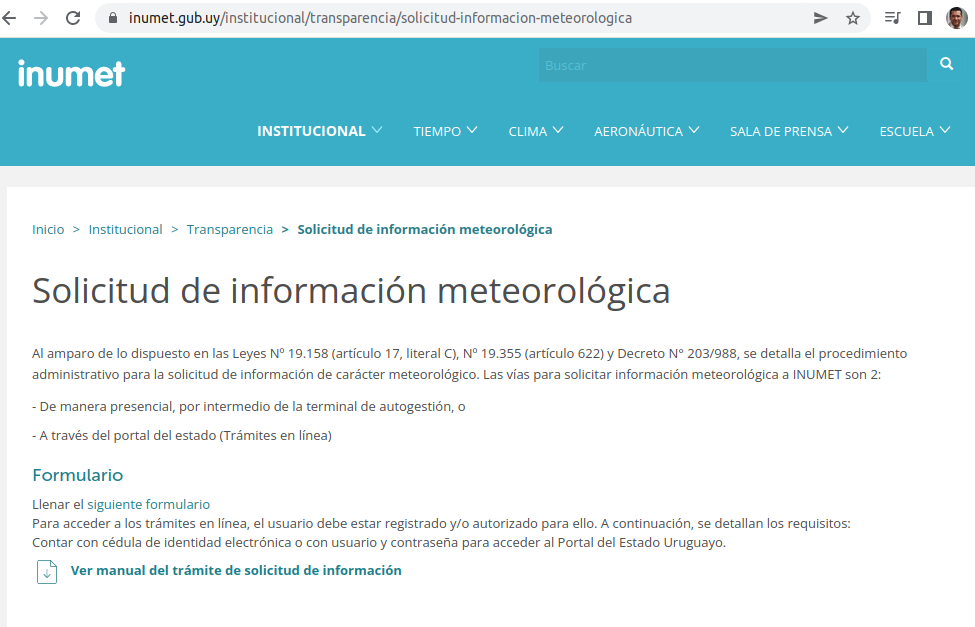

## Request Data



- Url: https://www.inumet.gub.uy/institucional/transparencia/solicitud-informacion-meteorologica
- Url: https://tramites.inumet.gub.uy/telinumet//portal/tramite.jsp?id=2504
 

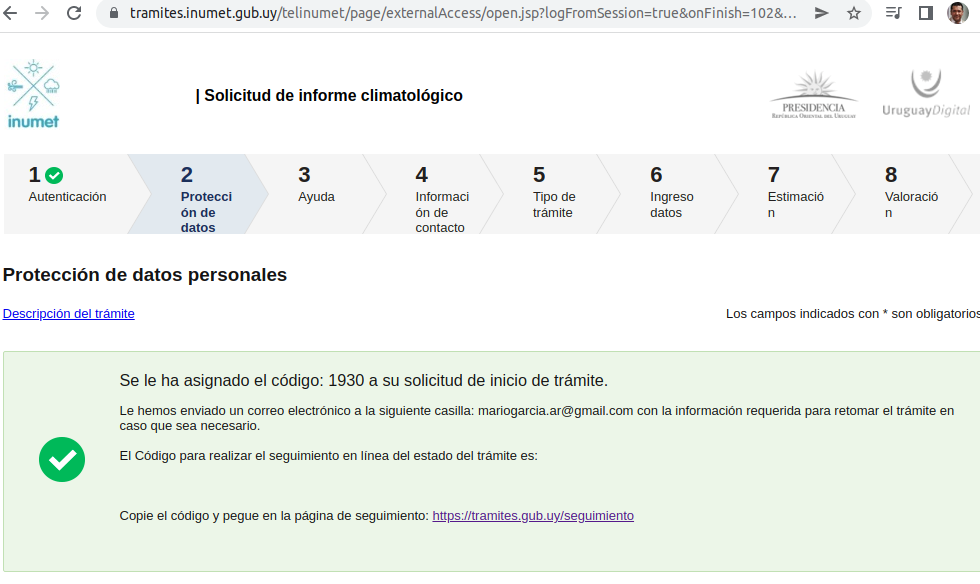

## Libraries

In [21]:
!apt install file

Reading package lists... Done
Building dependency tree       
Reading state information... Done
file is already the newest version (1:5.32-2ubuntu0.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [22]:
# https://pypi.org/project/wget/
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import wget
import os 
import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [25]:
def get_lat_lon(df,lat='lat',lon='lon'):
  char_sep = '#'
  df_ = df.reset_index()[[lat,lon]] #  
  df_['idx'] = df_[lat].astype(str) + char_sep + df_[lon].astype(str)
  df_ = [x.split(char_sep) for x in df_['idx'].unique()]
  df_ = np.array(df_, dtype=np.float64)
  return pd.DataFrame(df_, columns=['lat','lon'])



## Download Data

Check in your email and copy the download link

In [26]:
# Download data
shutil.rmtree('./data', ignore_errors=True)
os.mkdir('./data')

filename="/content/1622830248819-25 de Agosto 2000-2021.xlsx"

In [27]:
filename

'/content/1622830248819-25 de Agosto 2000-2021.xlsx'

Read metadata
   - **Estación** : station name
   - **Cod. Pluvio** :  
   - **Fecha** : date time 
   - **[mm]** :  precipitation
   - **Comentario** :  

## Show Data

In [28]:
!gdown -O "$filename" "1u-gQd5sHjM3VCx9LSqNp7t-DdvL5yxXh"

Downloading...
From: https://drive.google.com/uc?id=1u-gQd5sHjM3VCx9LSqNp7t-DdvL5yxXh
To: /content/1622830248819-25 de Agosto 2000-2021.xlsx
100% 168k/168k [00:00<00:00, 70.7MB/s]


In [29]:
!file -i "$filename"

/content/1622830248819-25 de Agosto 2000-2021.xlsx: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet; charset=binary


In [30]:
df_gauge = pd.read_excel(filename) 
df_gauge

,Estación,Cod. Pluvio,Fecha,[mm],Comentario
0,25 de Agosto,2748A,2000-01-01,0.0,NaN
1,25 de Agosto,2748A,2000-01-02,0.0,NaN
2,25 de Agosto,2748A,2000-01-03,0.0,NaN
3,25 de Agosto,2748A,2000-01-04,0.0,NaN
4,25 de Agosto,2748A,2000-01-05,0.0,NaN
...,...,...,...,...,...
7667,25 de Agosto,2748A,2020-12-28,0.0,NaN
7668,25 de Agosto,2748A,2020-12-29,10.0,NaN
7669,25 de Agosto,2748A,2020-12-30,1.5,NaN
7670,25 de Agosto,2748A,2020-12-31,0.0,NaN


## Add Georeferenced

- **Url**: https://www.inumet.gub.uy/index.php/clima/recursos-hidricos/mapa-de-estaciones

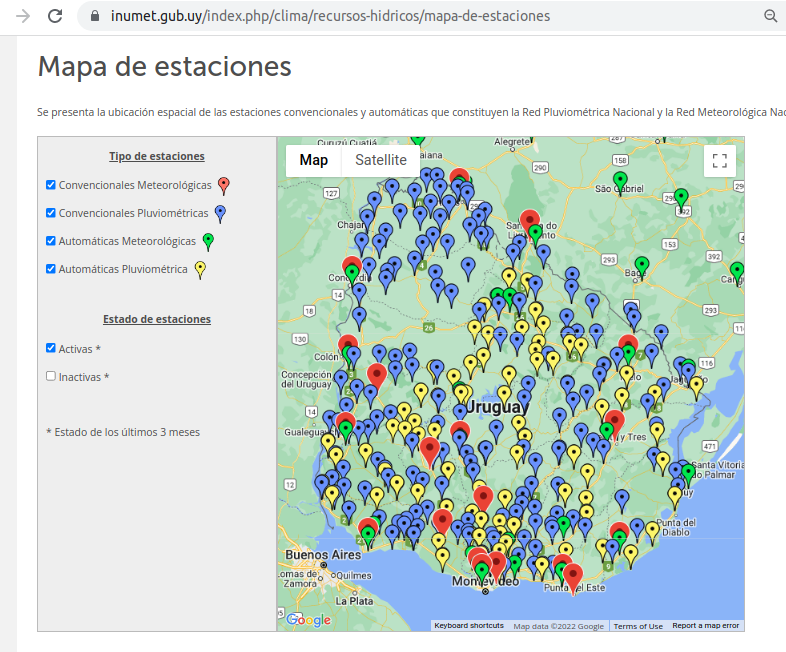

There is a complexity related to the georeferencing of stations. In the dataset, latitude and longitude are missing. So we need to add using an external source. In our case, we can use the mark provided by INUMET.

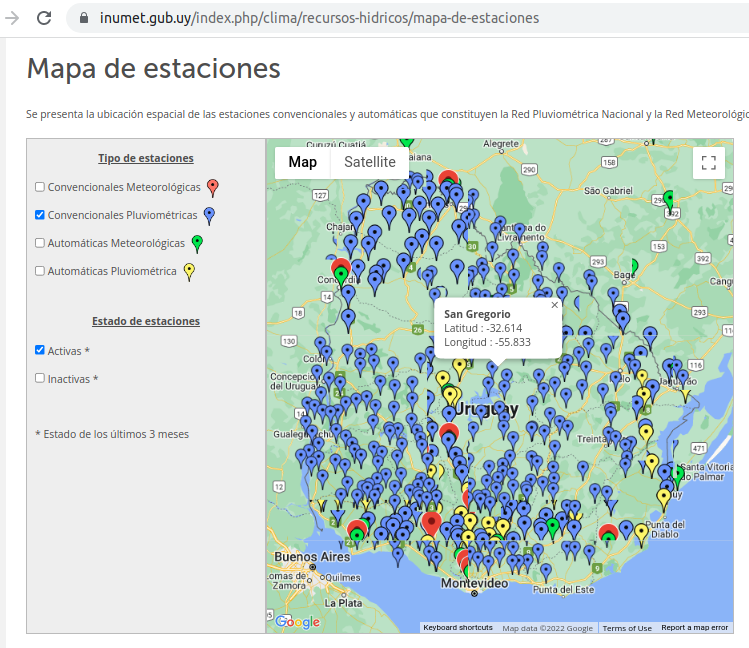

In [31]:
df_gauge['lat']=-34.412
df_gauge['lon']=-56.398
df_gauge
 


,Estación,Cod. Pluvio,Fecha,[mm],Comentario,lat,lon
0,25 de Agosto,2748A,2000-01-01,0.0,NaN,-34.412,-56.398
1,25 de Agosto,2748A,2000-01-02,0.0,NaN,-34.412,-56.398
2,25 de Agosto,2748A,2000-01-03,0.0,NaN,-34.412,-56.398
3,25 de Agosto,2748A,2000-01-04,0.0,NaN,-34.412,-56.398
4,25 de Agosto,2748A,2000-01-05,0.0,NaN,-34.412,-56.398
...,...,...,...,...,...,...,...
7667,25 de Agosto,2748A,2020-12-28,0.0,NaN,-34.412,-56.398
7668,25 de Agosto,2748A,2020-12-29,10.0,NaN,-34.412,-56.398
7669,25 de Agosto,2748A,2020-12-30,1.5,NaN,-34.412,-56.398
7670,25 de Agosto,2748A,2020-12-31,0.0,NaN,-34.412,-56.398


## Visualize ShapeFile

In [32]:
!gdown -O ./data/Uruguay_shapefile.zip "1ETYRUSliY736y5LmzdMCNZS06A3-FOQT"
!unzip -o -d ./data  ./data/Uruguay_shapefile.zip 


Downloading...
From: https://drive.google.com/uc?id=1ETYRUSliY736y5LmzdMCNZS06A3-FOQT
To: /content/data/Uruguay_shapefile.zip
100% 8.59k/8.59k [00:00<00:00, 13.2MB/s]
Archive:  ./data/Uruguay_shapefile.zip
  inflating: ./data/Uruguay.shp      
  inflating: ./data/Uruguay.dbf      
  inflating: ./data/Uruguay.shx      




File: ./data/Uruguay.shp 




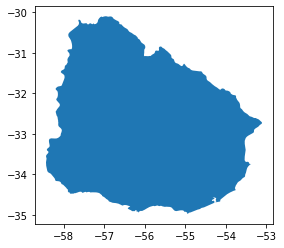

In [33]:

# file_shape = "/content/Uruguay.shp"
path = r'./data/*.shp'
files = glob.glob(path)
file_shape=files[0]
print('\n\nFile:', file_shape,'\n\n')


crs={'init':'epsg:4326'}
geodf_shape = gpd.read_file(file_shape, crs=crs)
geodf_shape.plot()


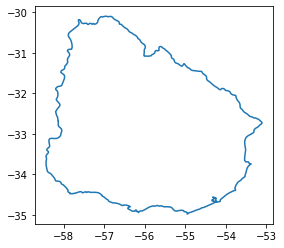

In [34]:
# plot boundaries
geodf_shape.boundary.plot()

## Plot

In [35]:
df_sat_lat_lon = get_lat_lon(df_gauge,'lat','lon')
df_sat_lat_lon[:5]

,lat,lon
0,-34.412,-56.398


In [36]:
df_sat_lat_lon.describe()

,lat,lon
count,1.000,1.000
mean,-34.412,-56.398
std,NaN,NaN
min,-34.412,-56.398
25%,-34.412,-56.398
50%,-34.412,-56.398
75%,-34.412,-56.398
max,-34.412,-56.398


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


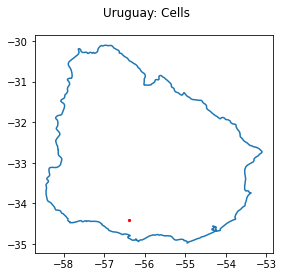

In [37]:
# coordinate reference system
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_sat_lat_lon['lon'], df_sat_lat_lon['lat'])]

fig, ax = plt.subplots()

df_geo_cells = gpd.GeoDataFrame(df_sat_lat_lon,crs=crs, geometry=geometry)
df_geo_cells.plot(ax=ax, color='red', markersize=5)

geodf_shape.boundary.plot(ax=ax)

fig.suptitle('Uruguay: Cells ', fontsize=12)
fig.show()

- **Spatial Resolution**: 1°x1°        (157.40 km diagonal distance [111.30kmx111.30km] )
- **Spatial Resolution**: 0.25°x0.25°  (39.35 km diagonal distance [27.83kmx27.83km] ) 
- **Spatial Resolution**: 0.1°x0.1°        (15.74 km diagonal distance [11.13kmx11.13km] )
- **Spatial Resolution**: 0.05°x0.05°  (7.87 km diagonal distance  [5.57kmx5.57km] )



## UTE Gauges Stations

In [38]:
!gdown -O ./data/stage03_inumet_estaciones_2000_2020.pickle "1ram2GJtUVsimRR3_tyHlk8C-bM_r2dvH"

Downloading...
From: https://drive.google.com/uc?id=1ram2GJtUVsimRR3_tyHlk8C-bM_r2dvH
To: /content/data/stage03_inumet_estaciones_2000_2020.pickle
100% 2.87k/2.87k [00:00<00:00, 4.82MB/s]


In [39]:
df_estaciones = pd.read_pickle('./data/stage03_inumet_estaciones_2000_2020.pickle')
df_estaciones

,estacion,lat,lon,id
0,Rivera,-30.896473,-55.542663,7bbcd1e7540060c3bf3a38b2c884a945
1,Punta del Este,-34.968940,-54.951223,324b8d592b49043c16a08dfd73c33336
2,Mercedes,-33.250514,-58.069076,8f3a02c856bc5d07dbe8f2c3a9ad002d
3,Cerro Colorado,-33.880000,-55.530000,24f5c9b152dfa8d5dec835e67e930334
4,Pueblo Centenario,-32.826000,-56.498000,7f845ff65ede7e75f2d7c08e78cd544a
5,Manuel Artigas Mal Abrigo,-34.149000,-56.952000,0a69c1ef1d7d7f2b44292782347ccde7
6,Aeropuerto Carrasco,-34.832923,-56.012876,8b3d884d6b35e1a1d5ae51404bd4a669
7,Cap. del Sauce,-33.460000,-55.630000,0069ffbcbdb6f83c018798ba51f3b93c
8,Salto,-31.438545,-57.981237,a1f709d0d2015a75e7124206eac310b5
9,San José,-34.351877,-56.749670,7a18bdb1940cce42dd62e2d81e0c39af


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


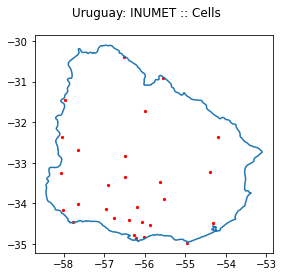

In [40]:
# coordinate reference system
crs={'init':'epsg:4326'}
geometry_estaciones=[Point(xy) for xy in zip(df_estaciones['lon'], df_estaciones['lat'])]

fig, ax = plt.subplots()

df_geo_cells = gpd.GeoDataFrame(df_estaciones,crs=crs, geometry=geometry_estaciones)
df_geo_cells.plot(ax=ax, color='red', markersize=5)

geodf_shape.boundary.plot(ax=ax)

fig.suptitle('Uruguay: INUMET :: Cells ', fontsize=12)
fig.show()